### Retail Price Optimization

#### Import Necessary Library

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

#### Import the dataset

In [86]:
df=pd.read_csv("D:/repository/Retail_Price_Optimization/retail_price.csv")
print(df.head(3))

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1  comp_2  ps2        fp2  \
0                   2  ...    89.9  3.9  15.011897   215.0  4.4   8.760000   
1                   2  ...    89.9  3.9  14.769216   209.0  4.4  21.322000   
2                   2  ...    89.9  3.9  13.993833   205.0  4.4  22.195932   

   comp_3  ps3        fp3  lag_price  
0   45.95  4.0  15.100000      45.90  
1   45.95  

In [87]:
df=df.drop(columns="product_id")

#### EDA

#### Check for missing value

In [88]:
df.isnull().sum()
#CONLUSION: There is no missing value in the dataset

product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [89]:
print(df.duplicated().sum().sum())

0


### EDA

#### Discriptive analysis

In [90]:
print(df.describe())

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

In [91]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       676 non-null    object 
 1   month_year                  676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend                     676 non

### Feature Engineering

#### Add a month_year column to the dataset

In [92]:
df["month_year"]=pd.to_datetime(df["month_year"],format='%d-%m-%Y').dt.strftime("%Y-%m")
print(df["month_year"])

0      2017-05
1      2017-06
2      2017-07
3      2017-08
4      2017-09
        ...   
671    2017-05
672    2017-06
673    2017-07
674    2017-08
675    2017-09
Name: month_year, Length: 676, dtype: object


#### Add new log_transformation of the following column

In [93]:
df["total_price_log"]=np.log(df["total_price"])
df["unit_price_log"]=np.log(df["unit_price"])
df["qty_log"]=np.log(df["qty"])

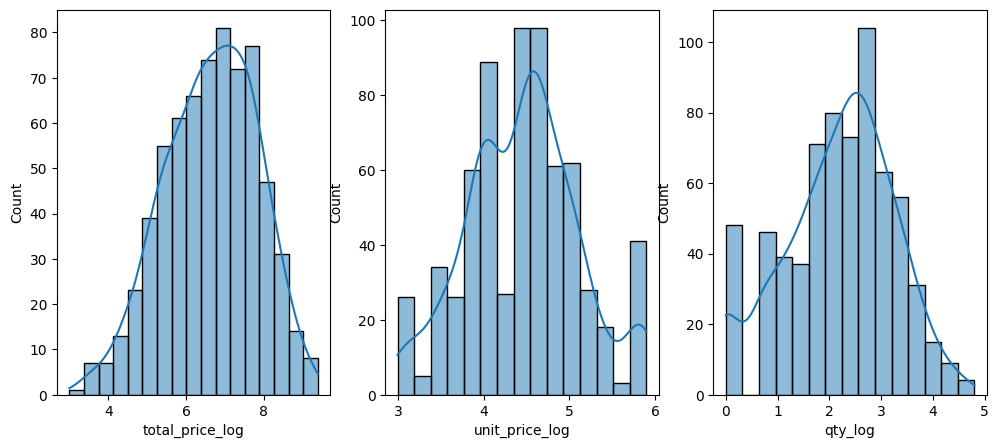

In [94]:
fig,axes=plt.subplots(1,3,figsize=(12,5))
axes=axes.flatten()
feature=["total_price_log","unit_price_log","qty_log"]
for i in range(len(feature)):
    sns.histplot(df[feature[i]],kde=True,ax=axes[i])


#### Categorical and Numerical Variable

In [95]:
categorical=df.select_dtypes(include=["object"]).columns
print(categorical)
numerical=df.select_dtypes(exclude=["object"]).columns
print(numerical)

Index(['product_category_name', 'month_year'], dtype='object')
Index(['qty', 'total_price', 'freight_price', 'unit_price',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
       'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       'lag_price', 'total_price_log', 'unit_price_log', 'qty_log'],
      dtype='object')


### Data Visualization

#### Heat Map

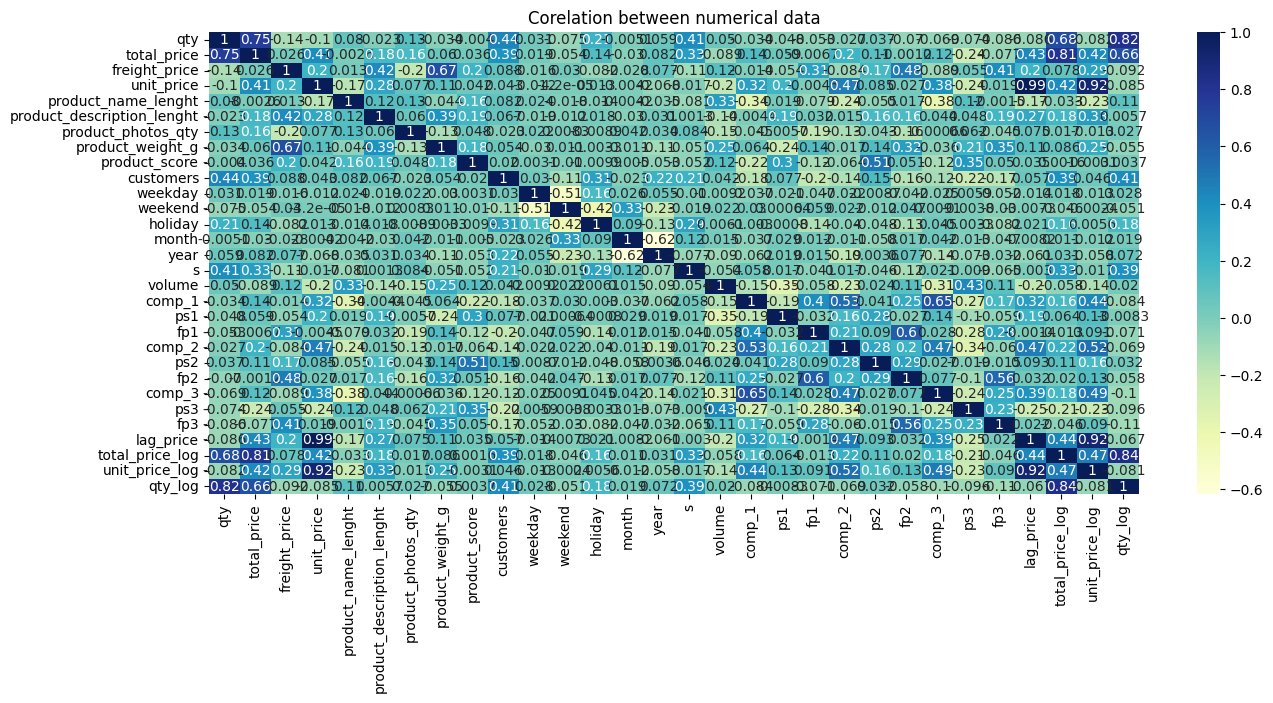

In [96]:
def heatmap(df,title):
    plt.figure(figsize=(15,6))
    #sns.set(font_scale=1)
    sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
    plt.title(title)
    plt.show()
    return

heatmap(df[numerical],"Corelation between numerical data")

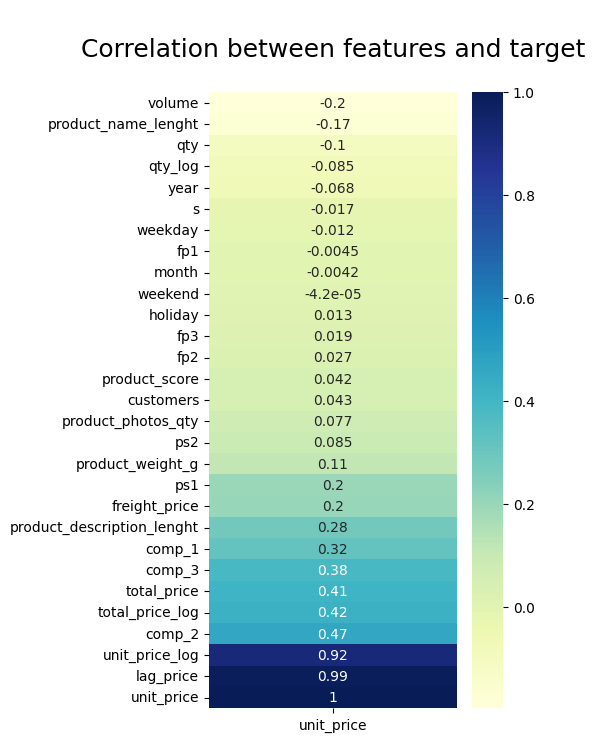

In [97]:
def target_heatmap(df,target,title=None):
    plt.figure(figsize=(4,8))
    sns.heatmap(df.corr()[[target]].sort_values(target,ascending=True)[1:],annot=True,cmap='YlGnBu')
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return 

target_heatmap(df[numerical],"unit_price","Correlation between features and target")


#### Scatter plot for numerical variable

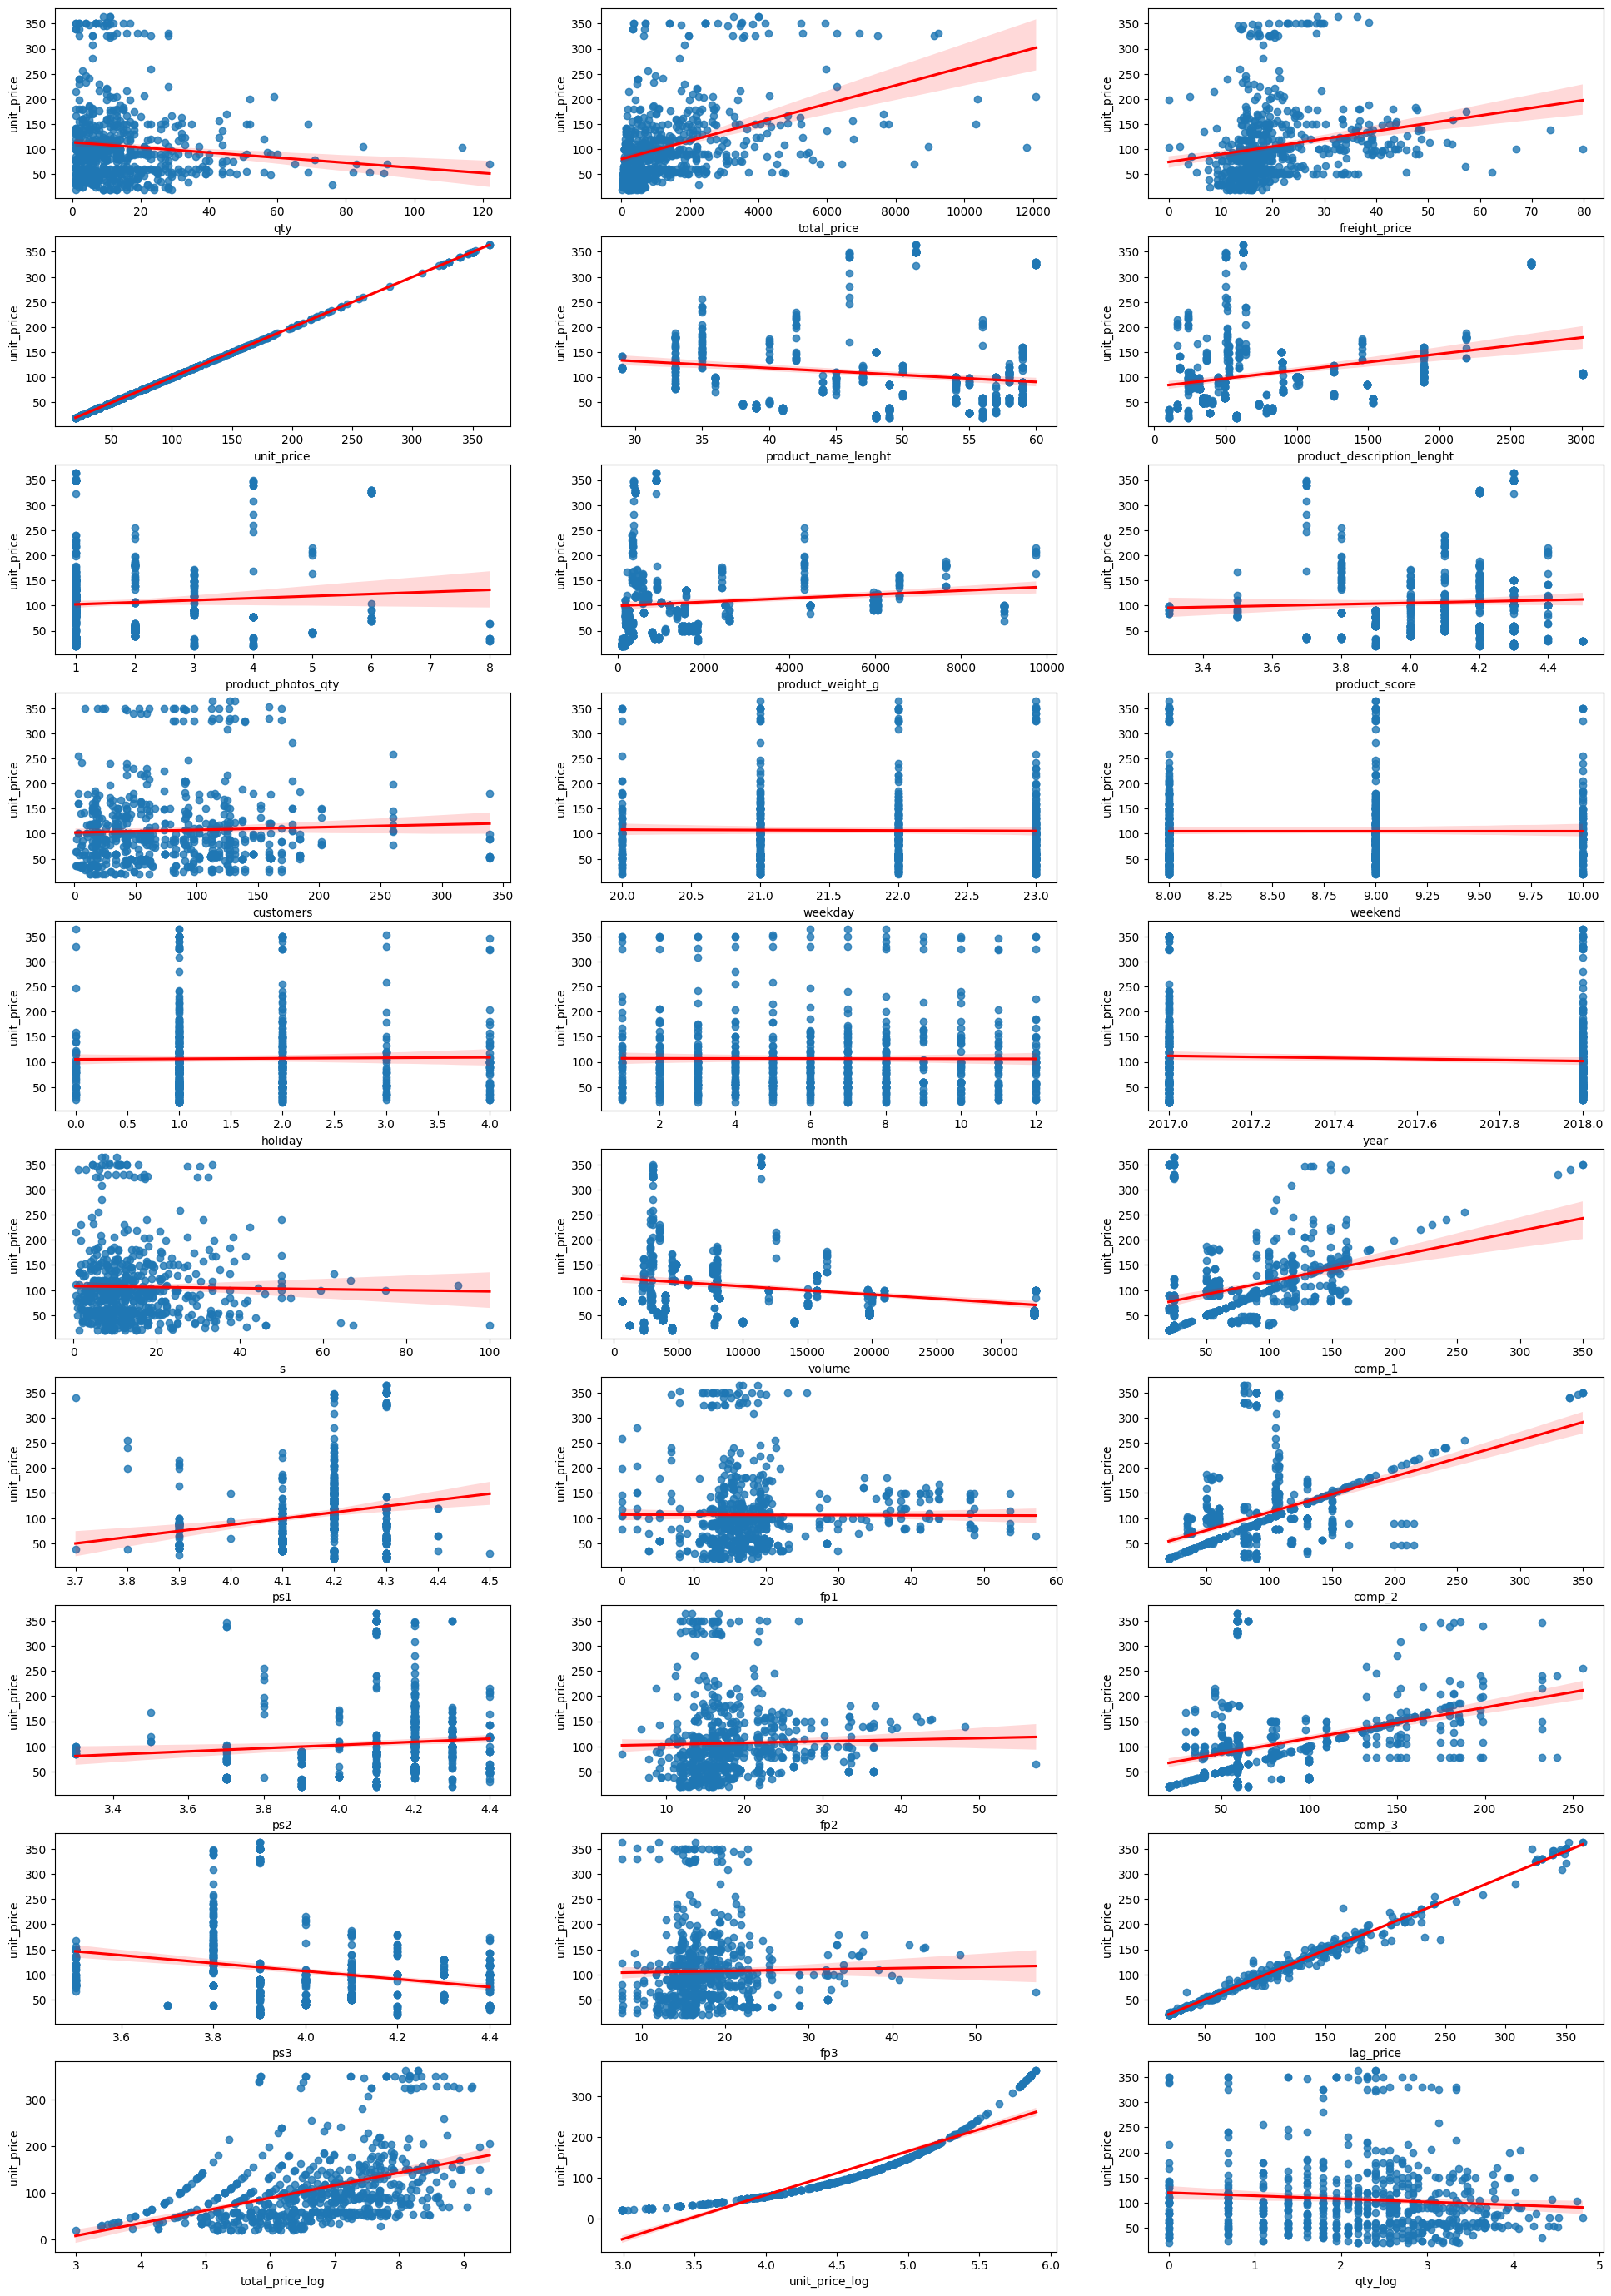

In [98]:
fig,axes=plt.subplots(10,3,figsize=(24,35))
axes=axes.flatten()
feature=list(numerical)
for i in range(len(feature)):
    sns.regplot(data=df,x=df[feature[i]],y="unit_price",ax=axes[i],line_kws={"color": "red"})
plt.show()

### Data Preprocessing

#### Remove unwanted feature from the dataframe

In [128]:
data=df.copy()
data.drop(["month_year","product_category_name","weekday","weekend","holiday","month","s","fp1","fp2","fp3","ps2","lag_price","unit_price_log"],axis=1,inplace=True)
print(len(data.columns))

19


#### split the dataframe into feature and target variable

In [123]:
x=data.drop(columns=["unit_price",])
y=data[["unit_price"]]
x_all=df.drop(columns=["unit_price","product_category_name","month_year"])
y_all=df[["unit_price"]]

#### Normalization of the feature

In [124]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns,index=x.index)
x_all=pd.DataFrame(sc.fit_transform(x_all),columns=x_all.columns,index=x_all.index)


#### Split the dataset into train and test data

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#For entire dataset
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(x_all,y_all,test_size=0.3,random_state=42)

### Model Building

#### Import Necessary Library

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#### Linear Regression Model

##### Built model using few selected feature

In [137]:
LR_model= LinearRegression()
LR_model.fit(x_train,y_train)
print("Train Score:", LR_model.score(x_test, y_test))
ypred=LR_model.predict(x_test)
#Model evalution
#RMSE
RMSE=np.sqrt(metrics.mean_absolute_error(y_test,ypred))
print("RMSE:",RMSE)
#MAE
MAE = metrics.mean_absolute_error(y_test, ypred )
print("MAE",MAE)
#R2
R2=metrics.r2_score(y_test,ypred)
print("Goodness of fit",R2)
#Adjusted R-Square
n=len(x)#Total number of data sample
k=19#Number of independent Variable
adjR2=1-((1-R2)*(n-1)/(n-k-1))
print("Adjusted R-Square:",adjR2)

Train Score: 0.86155816894895
RMSE: 4.549426343144683
MAE 20.6972800516988
Goodness of fit 0.86155816894895
Adjusted R-Square: 0.857548420793508


##### Built model using all the feature 

In [136]:
LR_model= LinearRegression()
LR_model.fit(X_TRAIN,Y_TRAIN)
print("Train Score:", LR_model.score(X_TRAIN,Y_TRAIN))
ypred=LR_model.predict(X_TEST)
#Model evalution
#RMSE
RMSE=np.sqrt(metrics.mean_absolute_error(Y_TEST,ypred))
print("RMSE:",RMSE)
#MAE
MAE = metrics.mean_absolute_error(Y_TEST , ypred )
print("MAE",MAE)
#R2
R2=metrics.r2_score(Y_TEST,ypred)
print("Goodness of fit",R2)
#Adjusted R-Square
n=len(x_all)#Total number of data sample
k=29#Number of independent Variable
adjR2=1-((1-R2)*(n-1)/(n-k-1))
print("Adjusted R-Square:",adjR2)

Train Score: 0.9901182446692185
RMSE: 2.1224695990804903
MAE 4.504877199020897
Goodness of fit 0.9907741043065966
Adjusted R-Square: 0.9903599387104531


#### Random Forest

In [133]:
RF_model= RandomForestRegressor()
RF_model.fit(X_TRAIN,Y_TRAIN)
print("Train Score:", RF_model.score(X_TRAIN,Y_TRAIN))
ypred=RF_model.predict(X_TEST)
#Model evalution
#RMSE
RMSE=np.sqrt(metrics.mean_absolute_error(Y_TEST,ypred))
print("RMSE:",RMSE)
#MAE
MAE = metrics.mean_absolute_error(Y_TEST , ypred )
print("MAE",MAE)
#R2
R2=metrics.r2_score(Y_TEST,ypred)
print("Goodness of fit",R2)
#Adjusted R-Square
n=len(x_all)#Total number of data sample
k=29#Number of independent Variable
adjR2=1-((1-R2)*(n-1)/(n-k-1))
print("Adjusted R-Square:",adjR2)

C:\Users\plato\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Score: 0.9999148839053914
RMSE: 0.8652776025267828
MAE 0.748705329434497
Goodness of fit 0.999439113514722
Adjusted R-Square: 0.9994139344000579


### Feature Importance

In [132]:
feature_importances=RF_model.feature_importances_
#pair the name with their importance score
feature_name=x_all.columns
feature_importance_dict = dict(zip(feature_name, feature_importances))
#sort the value and print the feature importance
sorted_feature=sorted(feature_importance_dict.items(),key=lambda x:x[1],reverse=True)
for feature,importance in sorted_feature:
    print(f"{feature}: {importance:.4f}")

unit_price_log: 0.9357
lag_price: 0.0615
product_name_lenght: 0.0012
product_score: 0.0002
comp_2: 0.0001
fp1: 0.0001
freight_price: 0.0001
comp_3: 0.0001
product_weight_g: 0.0001
customers: 0.0001
comp_1: 0.0001
fp2: 0.0001
product_photos_qty: 0.0001
total_price_log: 0.0001
fp3: 0.0001
volume: 0.0001
product_description_lenght: 0.0001
ps2: 0.0000
qty_log: 0.0000
total_price: 0.0000
s: 0.0000
ps3: 0.0000
month: 0.0000
qty: 0.0000
ps1: 0.0000
weekday: 0.0000
holiday: 0.0000
weekend: 0.0000
year: 0.0000
